# ECE113 Lab 1: Software Defined Radio -  Part I: Windows

### Originally written by Miki Lustig for EE123 at UC Berkeley. 
Updated by Josh Sanz, Spring 2020, 
Updated by Kambiz Shoarinejad for ECE113 at UCLA, Spring 2021

## Frequency analysis using the DFT and windowing

In this lab you will perform frequency analysis and will look at the effect of using different windows, length of sequence and averaging

In [1]:
# Import functions and libraries
import numpy as np, matplotlib.pyplot as plt
from numpy import *
from numpy.fft import *
from matplotlib.pyplot import *

import numpy.fft as fft

%matplotlib inline

The following code implements the different windows, many of which we will be discussing in the class:

In [2]:
def pltWindowedFFT(y, N):
    # functions takes a signal y, multiplies it with several windows
    # , computes the N-length DFT of the (zero-padded) sequence
    # and displays its single sided spectrum.
    #
    #  y -  Signal
    #  N -  Length of DFT (zero-padding)
    
    L = len(y)
    Y_rect = fft.fft(y,N) 
    Y_rect = 20*log10(abs(Y_rect)/max(abs(Y_rect)))
    Y_bart = fft.fft(y*np.bartlett(L),N)
    Y_bart = 20*log10(abs(Y_bart)/max(abs(Y_bart)))
    Y_hann = fft.fft(y*np.hanning(L),N)
    Y_hann = 20*log10(abs(Y_hann)/max(abs(Y_hann)))
    Y_hamm = fft.fft(y*np.hamming(L),N)
    Y_hamm = 20*log10(abs(Y_hamm)/max(abs(Y_hamm)))
    Y_blackman = fft.fft(y*np.blackman(L),N)
    Y_blackman = 20*log10(abs(Y_blackman)/max(abs(Y_blackman)))
    Y_kaiser = fft.fft(y*np.kaiser(L,6),N)
    Y_kaiser = 20*log10(abs(Y_kaiser)/max(abs(Y_kaiser)))
    Y_kaiser9 = fft.fft(y*np.kaiser(L,9),N)
    Y_kaiser9 = 20*log10(abs(Y_kaiser9)/max(abs(Y_kaiser9)))
    
    
    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_rect[0:N//2])
    plt.title('Rect')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig1.png', transparent=True,bbox_inches='tight')

    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_bart[0:N//2])
    plt.title('Triangle')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig2.png', transparent=True,bbox_inches='tight')

    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_hamm[0:N//2])
    plt.title('Hamming')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig3.png', transparent=True,bbox_inches='tight')

    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_hann[0:N//2])
    plt.title('Hann')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig4.png', transparent=True,bbox_inches='tight')

    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_blackman[0:N//2])
    plt.title('Blackman')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig5.png', transparent=True,bbox_inches='tight')
    
    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_kaiser[0:N//2])
    plt.title('Kaiser Beta=6')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig6.png', transparent=True,bbox_inches='tight')

    fig = figure(figsize=(16,2))
    plot(r_[0.0:N/2.0]/N*2*pi,Y_kaiser9[0:N//2])
    plt.title('Kaiser Beta=9')
    plt.ylabel('db')
    plt.xlabel('rad')
    axis((0,pi,-80,2))
    #savefig('fig7.png', transparent=True,bbox_inches='tight')


Here we generate a 128 length sequence. The sequence is a sum of sinusoids that are close in frequency, but have a large dynamic range in the amplitude. We first compute the DFT of the sequence with different windows. The different window functions will trade-off the mainlobe width with sidelobe spectral artifacts, which, as we will learn, result in the so-called "DFT Leakage". 

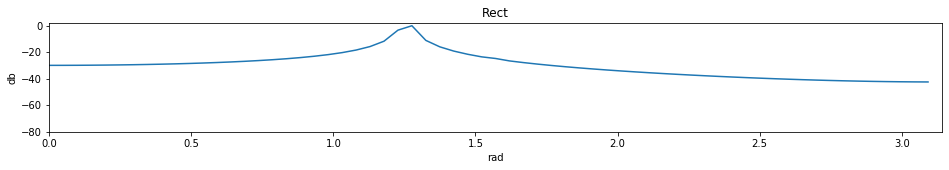

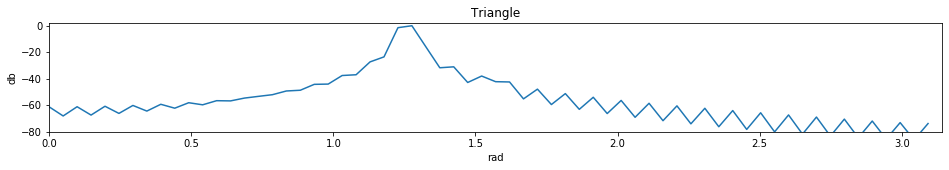

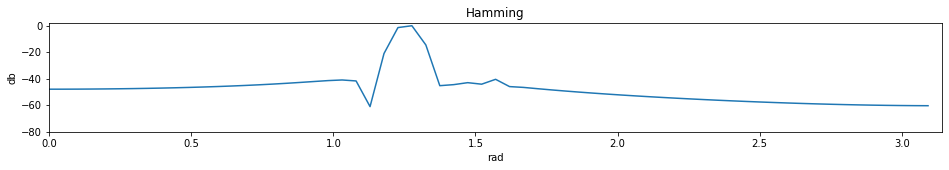

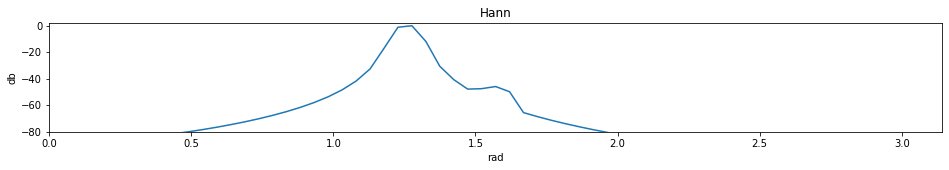

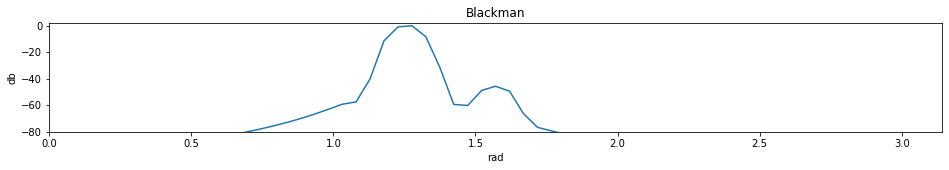

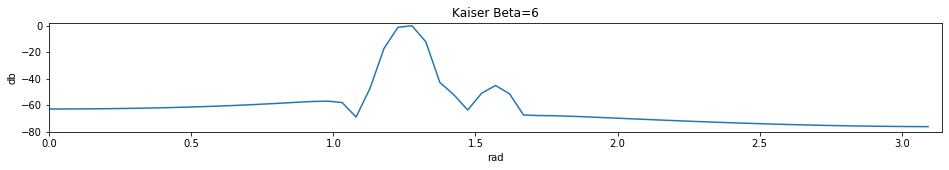

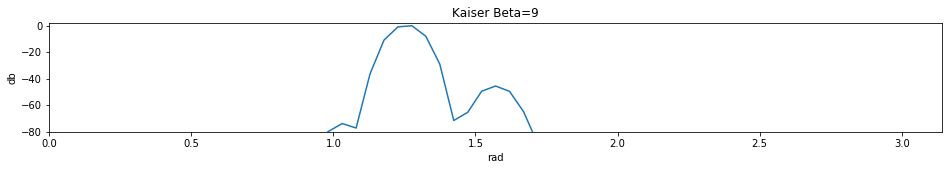

In [3]:
noise_std = 0  # standard deviation of additive noise
N = 128        # FFT size
L = 128        # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2     # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)

## Task 1: zero-padding

As you can see, the spectrum does not look "nice". In order to evaluate the spectrum at more points, in a way that is closer to how the DTFT would look, we need to zero-pad, which effectively increases the number of points used in our DFT/FFT and hence improve our spectral resolution. 

* Zero pad the sequence to 256. Can you see improvement? Did the peak width, and the sidelobes amplitude change?
* Zero pad the sequence to 512, 1024, 4096. Will increasing the zero-padding further change the shape of the spectrum? 

Run each experiment in a different cell, so you can see the result better. 

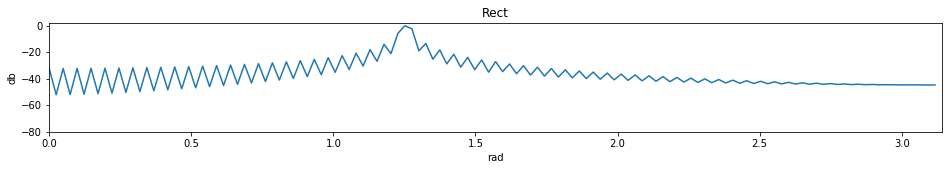

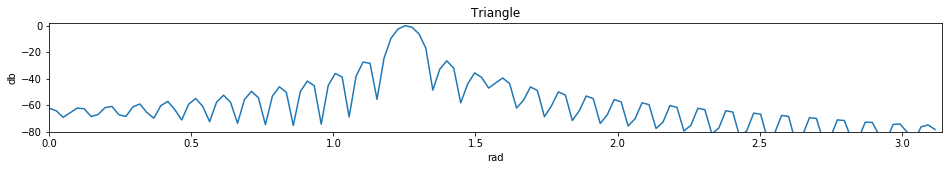

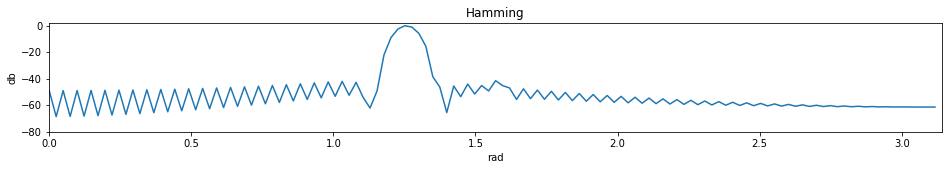

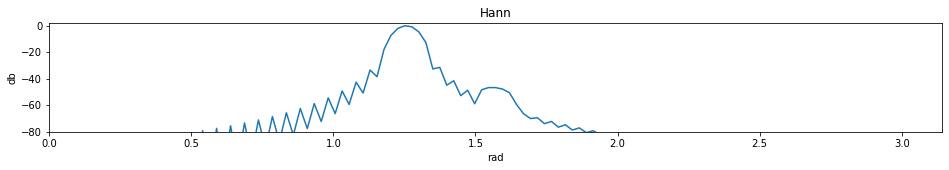

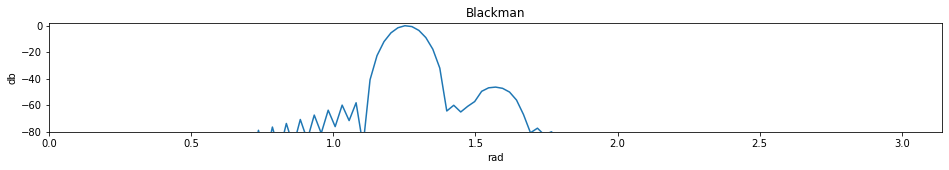

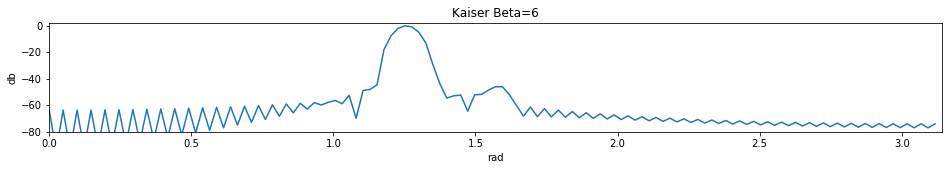

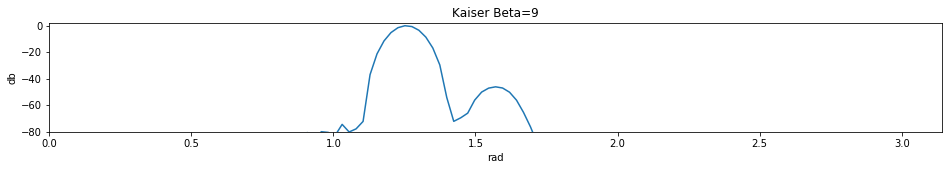

In [4]:
noise_std = 0  # standard deviation of additive noise
N = 256        # change from 128 to 256 to zero pad
L = 128        # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2     # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)

Answers here:

Peak width definitely got narrower for most of the windows (least noticable on kaiser beta=9). Side lobe amplitude also changed in the sense that their existence is much clearer, especially for the rectangular, Hamming, Hanning, Blackman and kaiser windows where the side lobes didn't show when N = 128. 


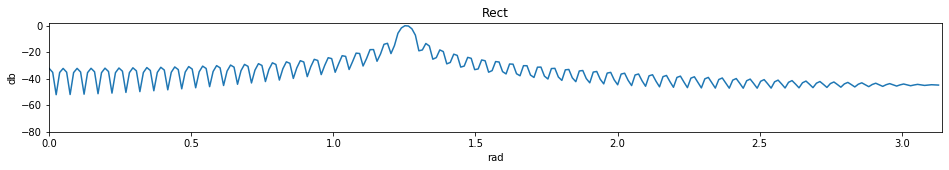

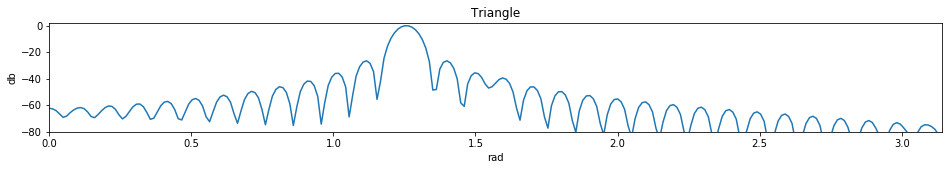

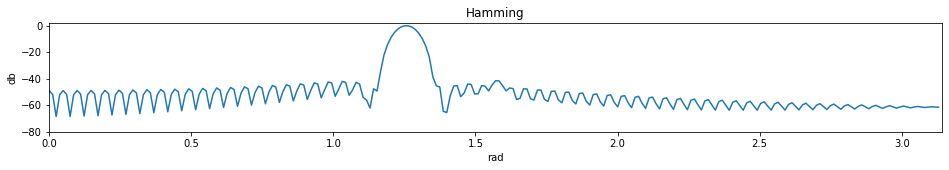

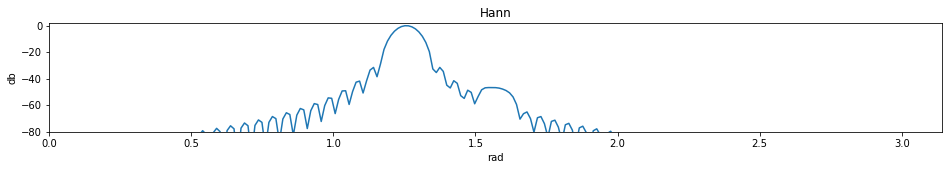

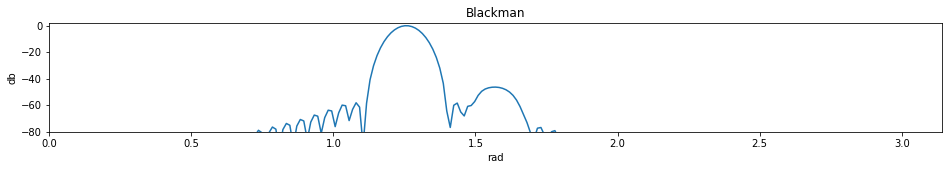

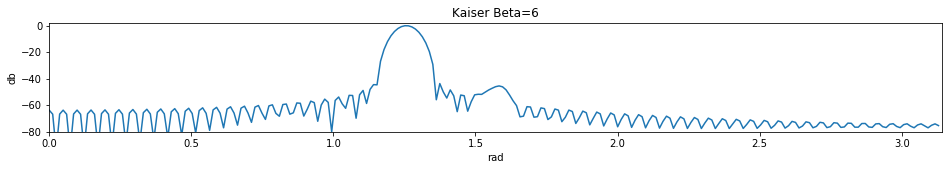

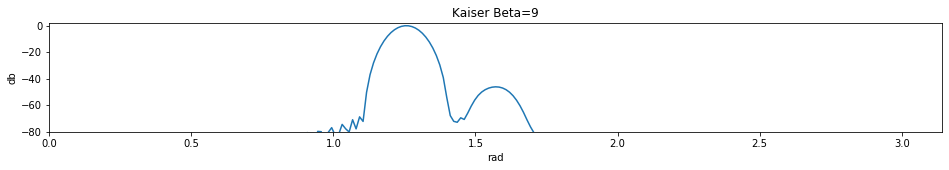

In [5]:
# your code here
noise_std = 0  # standard deviation of additive noise
N = 512        # zero pad to 512
L = 128        # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2     # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)

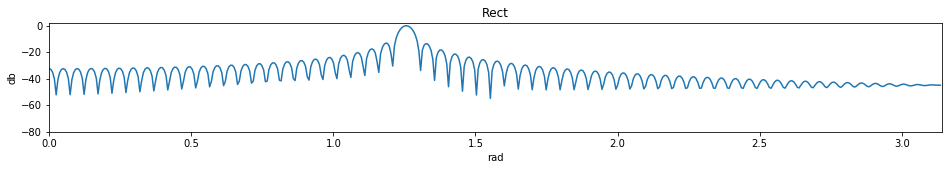

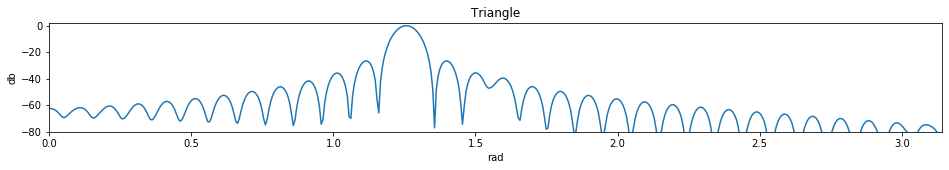

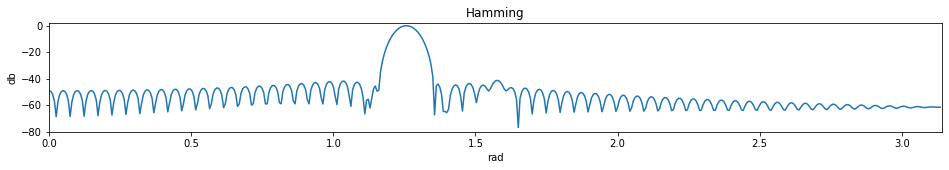

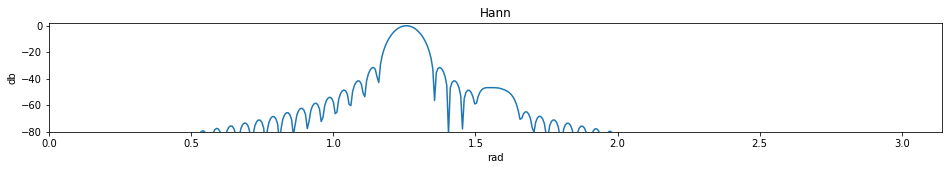

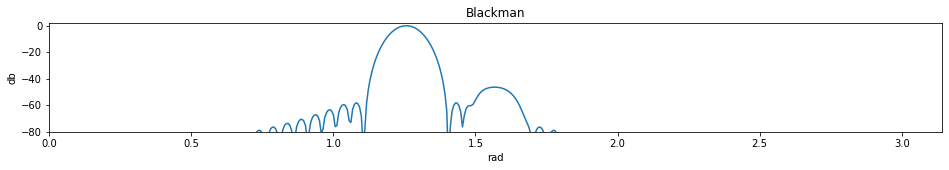

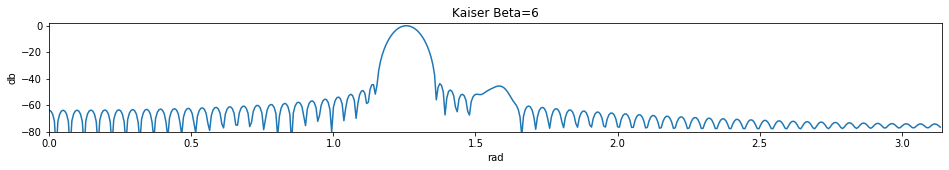

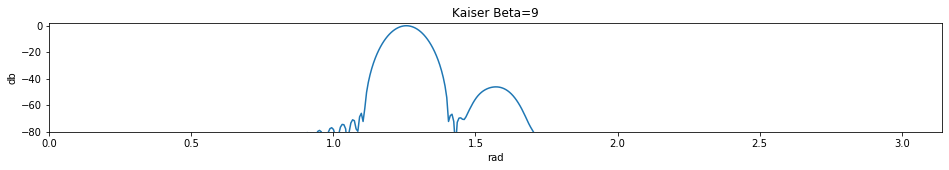

In [6]:
# your code here
noise_std = 0  # standard deviation of additive noise
N = 1024        # zero pad to 1024
L = 128        # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2     # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)

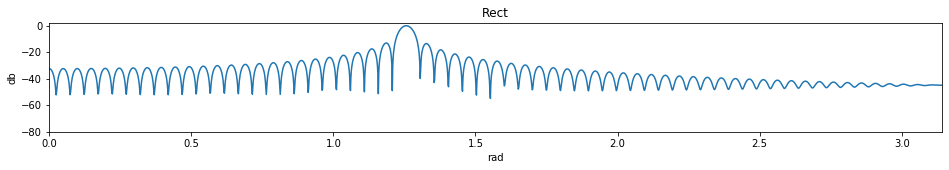

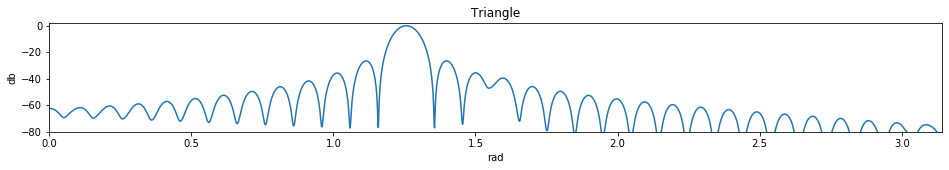

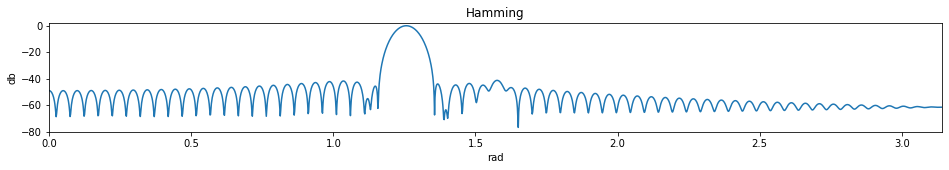

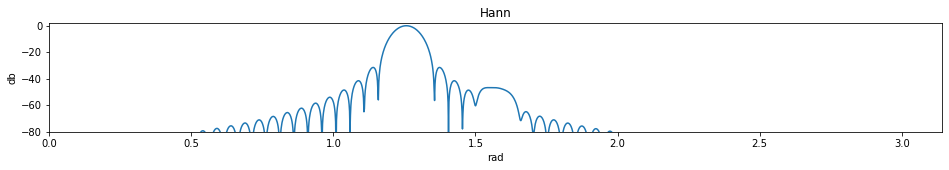

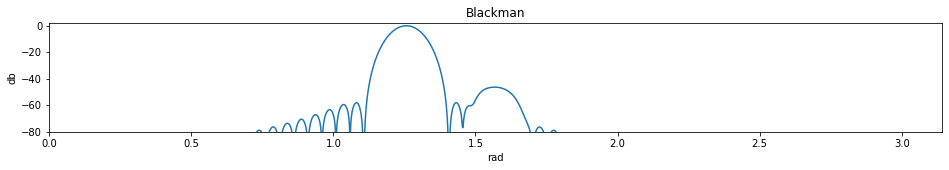

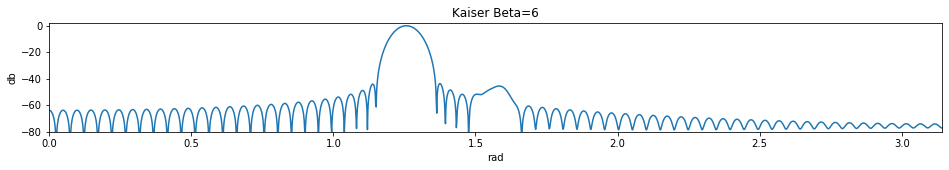

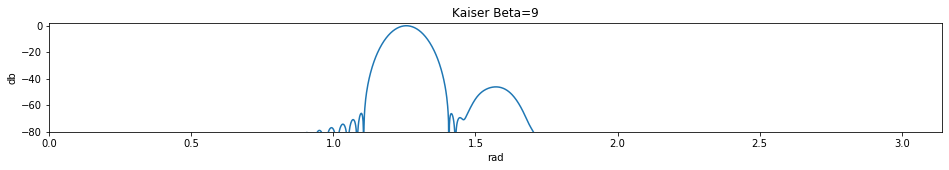

In [7]:
# your code here
noise_std = 0  # standard deviation of additive noise
N = 4096        # zero pad to 4096
L = 128        # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2     # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)

Answers here:

There's only really a noticable difference in the plots with the rectangular window between N = 512 and N = 1024 in which the side lobes become much more defined. Outside of that, increasing N doesn't seem to change the shape of the spectrum plots.

## Task 2: Window sizes and noise

In this task we will add Gaussian noise with standard deviation of 0.01 to the sequence. We will look at how increasing the sequence length improves the spectral resolution, as well as the signal-to-noise ratio of the spectrum. As we will learn in the class, this is sometimes known as the "DFT Processing Gain".

Set the DFT length to N=4096, and set noise_std=0.01

* Generate the sequence for L=128 and plot the windowed spectra. Can you see the small peak? 
* Generate the sequence for L=512 and plot the windowed spectra. Can you see the small peak? Comment on the resolution of the peaks
* Generate the sequence for L=2048 and plot the windowed spectra. Comment on the signal-to-noise ratio? Comment on the resolution of the peaks

As we will learn, in general, for stationary signals, increasing the size of the window by an order of $P$, will result in $10\log(P)$ dB improvement in SNR. That is because the signal power will improve by the factor of $P^2$ while the noise power will increase by the factor of $P$. 

This is a classic paper by Fred Harris on this topic: http://web.mit.edu/xiphmont/Public/windows.pdf

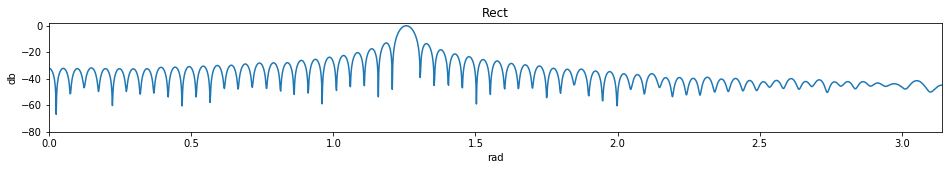

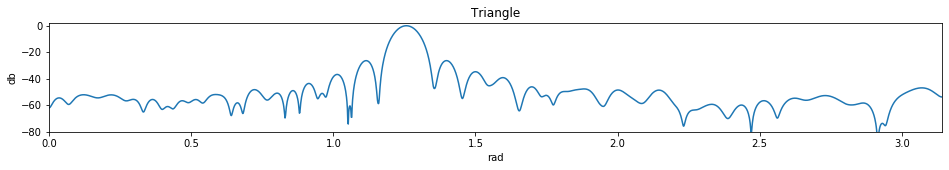

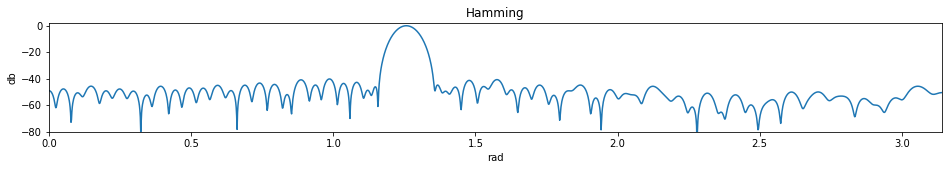

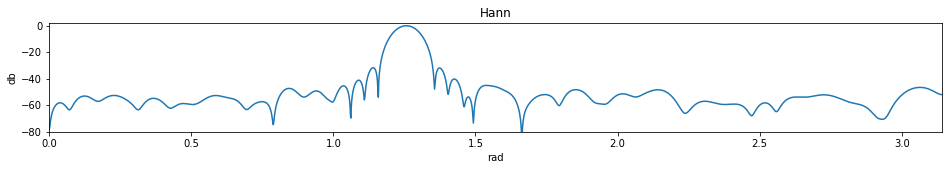

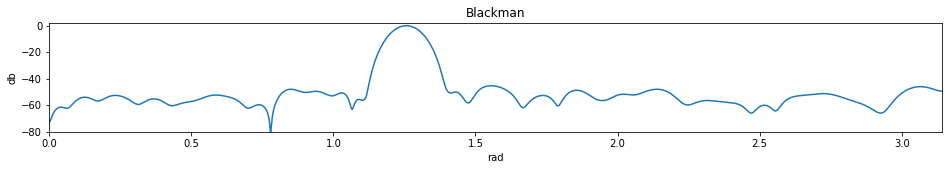

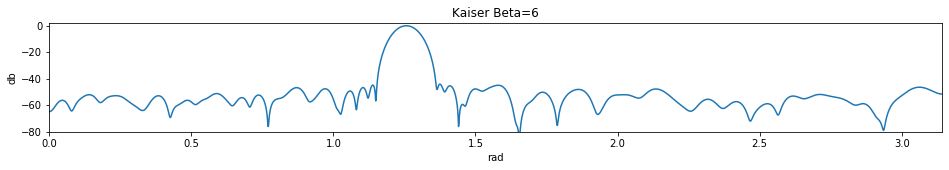

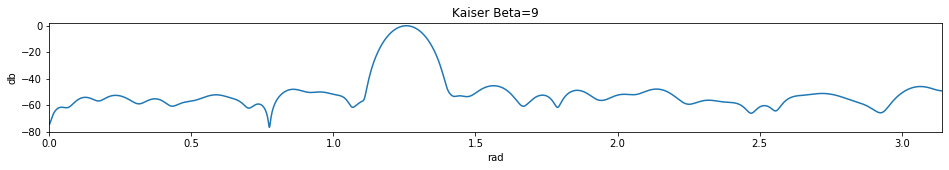

In [8]:
# Generate the sequence for L=128 and plot the windowed spectra. Can you see the small peak? 
noise_std = 0.01  # standard deviation of additive noise
N = 4096        # FFT size
L = 128        # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2     # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)

Answers Here:

There is a small peak visible; however, the peak's lobe is pretty wide due to low resolution.

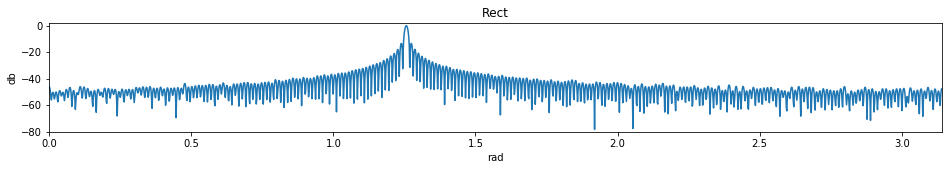

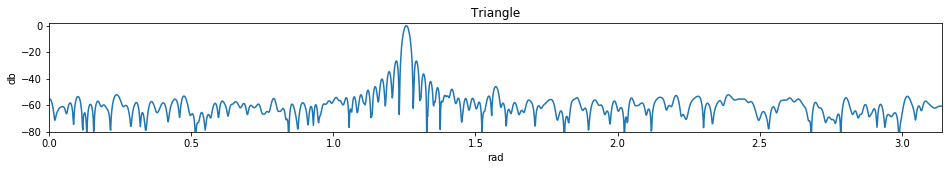

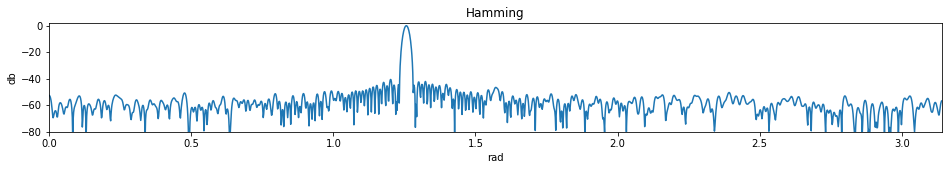

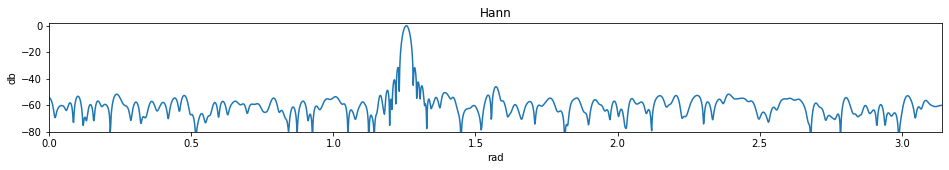

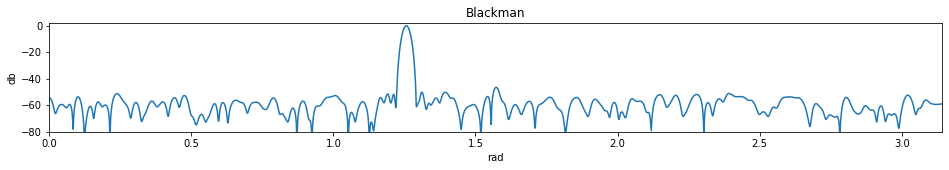

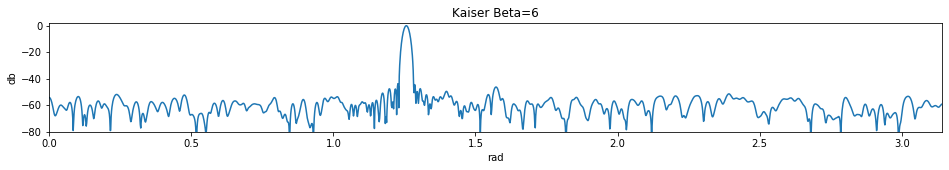

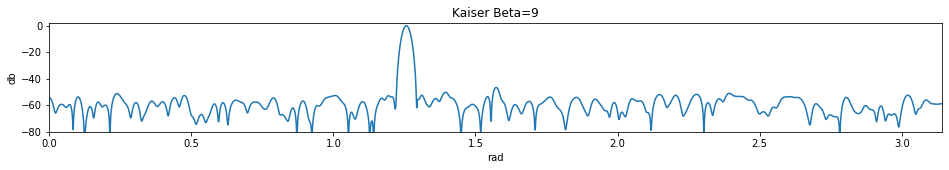

In [9]:
# Generate the sequence for L=512 and plot the windowed spectra. Can you see the small peak? 
# Comment on the resolution of the peaks.
noise_std = 0.01  # standard deviation of additive noise
N = 4096        # FFT size
L = 512        # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2     # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)

Answers Here:

The spectral resolution is greatly improved with the increase in L from 128 to 512. The small peak is now more visible, and is able to be distinguished from the rest of the spectrum due to this.

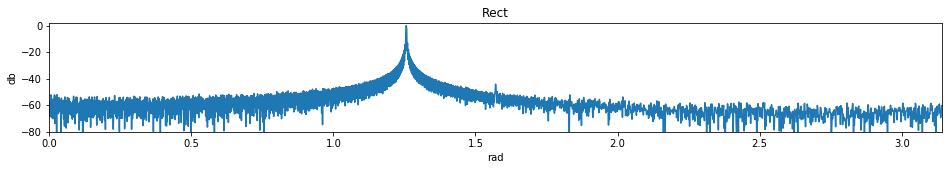

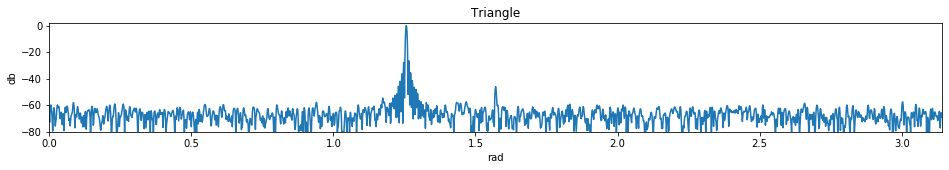

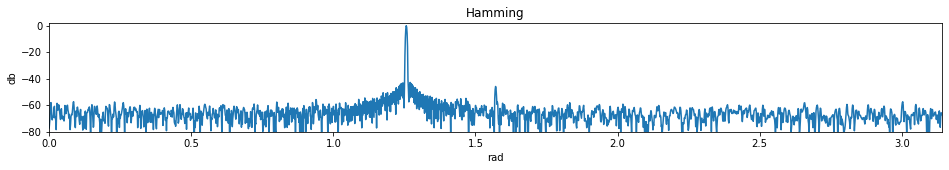

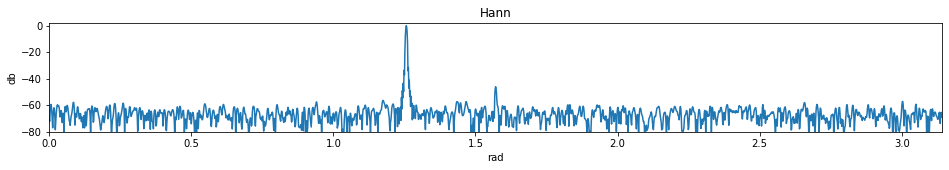

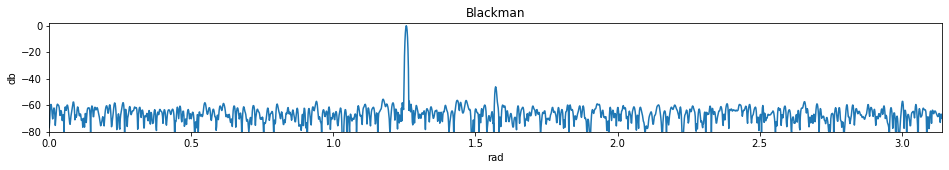

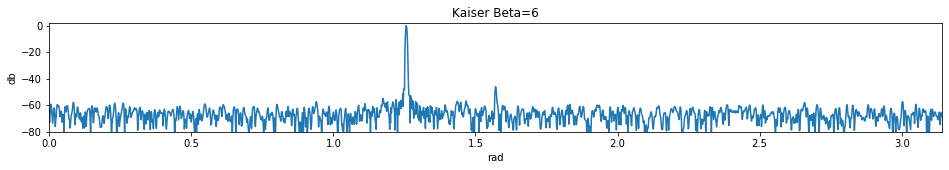

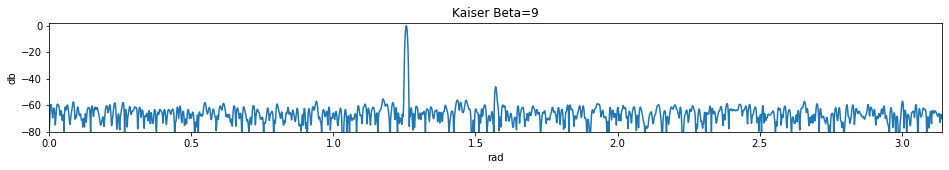

In [10]:
# Generate the sequence for L=2048 and plot the windowed spectra. 
# Comment on the signal-to-noise ratio. Comment on the resolution of the peaks.
noise_std = 0.01  # standard deviation of additive noise
N = 4096        # FFT size
L = 2048       # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2     # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

pltWindowedFFT(y, N)

Answers Here:

Due to the larger L, the resolution is much improved; the peaks are much sharper. The signal-to-noise ratio is also higher.

## Task 3: Average Power Spectrum

As we increase the size of the window, the SNR of our spectrum improves, and the resolution of the spectrum also improves. However, sometimes we are not necessarily interested in increasing the resolution or sizes of our FFTs, but we may be interested in getting better SNR. 

One way to do so is to break the sequence into non-overlapping sections of the desired length, compute their magnitude spectra, and then average the results. This is often called the average power spectrum. It is important to note that averaging the complex spectrum will often not result in a desired outcome. The reason is that the phase of the peaks in each segment may be different, depending on how we break the sequence and what frequencies are involved. In that case, complex averaging will probably lead to cancellation of the signal. 


* Set the DFT length to N=4096, and set noise_std=0.01. Generate the sequence with total length of: 10240. 
* Break the sequence into 20 segments of L=512. Window each segment with a Kaiser window with $\beta=6$. 
* Zero-pad each segment to length N=4096 and compute the FFT. 
* Compute the average magnitude of the spectra, and display the result using the function ``semilogy`` 
* For comparison, compute the average of the complex spectra and then take the magnitude and display the result. 
* Compare the result of the average power spectrum to the spectrum of the Kaiser window in Task 2


Text(0.5, 1.0, 'Complex average of the spectrum')

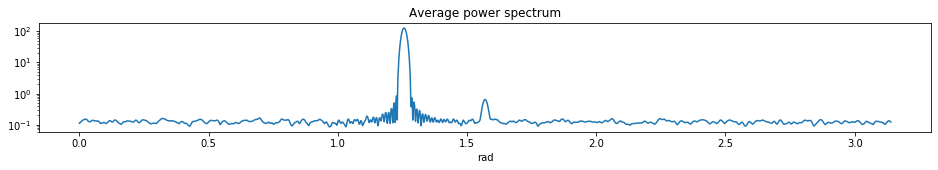

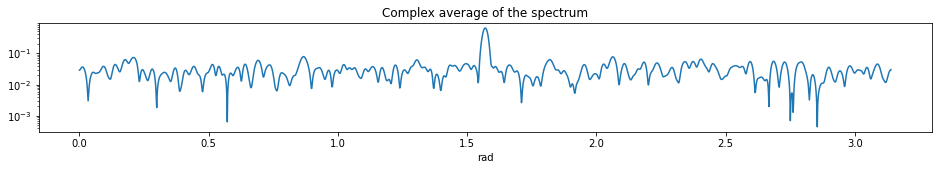

In [12]:
# Your code below:

noise_std = 0.01  # standard deviation of additive noise
N = 4096        # FFT size
L = 10240       # Window size

n = r_[0.0:L]

omega1 = 2*pi*0.2     # frequency 1
omega2 = 2*pi*0.25    # frequency 2
A1 = 1                # amplitude of 1st sinusoid
A2 = 0.005            # amplitude of second sinusoid
y = A1*sin(omega1*n) + A2*sin(omega2*n) + np.random.randn(L)*noise_std

# reshape y
# 20 segments of 512
segmented_y = np.reshape(y,(20,512))
# apply kaiser window
segmented_y = segmented_y*np.kaiser(512,6)

# compute fft
X = fft.fft(segmented_y, N)

# Compute means
Pspect = mean(abs(X),axis=0);
Pspect_cplx = abs(mean(X,axis=0));


# Plotting:
fig = figure(figsize=(16,2))
semilogy(r_[0.0:N/2.0]/N*2*pi,Pspect[0:N//2])
plt.xlabel('rad')
plt.title('Average power spectrum')
fig = figure(figsize=(16,2))
semilogy(r_[0.0:N/2.0]/N*2*pi,Pspect_cplx[0:N//2])
plt.xlabel('rad')
title('Complex average of the spectrum')

Answers Here:

Compared to Task 2's kaiser window with N = 4096 and L = 512, the signal to noise ratio for the average power spectrum is much higher, as the small peak is still very visible but with the rest of the spectrum much flatter in comparison.